This is a jupyter notebook file for Linear Regression model for predicting stocks at a SKU 

Inputs: SKU, Price, Revenue generated, Lead times, Shipping times, Shipping costs, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Routes, Costs

Output: Stock levels

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle

In [3]:
data = pd.read_csv(r'C:\Users\omgha\OneDrive\Documents\GitHub\SupplyChainManagement\data\sample\supply_chain_data_processed_1.csv')

In [4]:
data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,1,0,69.808006,55,802,8661.996792,2,58,7,96,...,4,29,215,29,46.279879,2,0.226410,2,1,187.752075
1,2,1,14.843523,95,736,7460.900065,0,53,30,37,...,4,23,517,30,33.616769,2,4.854068,2,1,503.065579
2,1,12,11.319683,34,8,9577.749626,3,1,10,88,...,4,12,971,27,30.688019,2,4.580593,0,2,141.920282
3,2,23,61.163343,68,83,7766.836426,2,23,13,59,...,3,24,937,18,35.624741,0,4.746649,1,0,254.776159
4,2,34,4.805496,26,871,2686.505152,2,5,3,56,...,2,5,414,3,92.065161,0,3.145580,0,0,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,95,77.903927,65,672,7386.363944,3,15,14,26,...,4,18,450,26,58.890686,2,1.210882,0,0,778.864241
96,0,96,24.423131,29,324,7698.424766,2,67,2,32,...,4,28,648,28,17.803756,2,3.872048,2,0,188.742141
97,1,97,3.526111,56,62,4370.916580,1,46,19,4,...,4,10,535,13,65.765156,0,3.376238,2,0,540.132423
98,2,98,19.754605,43,913,8525.952560,0,53,1,27,...,1,28,581,9,5.604691,2,2.908122,1,0,882.198864


In [5]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
data['Lead times']=data['Lead times'].astype(int)
data['Shipping times']= data['Shipping times'].astype(int)
data['Lead time']= data['Lead time'].astype(int)
data['Manufacturing lead time']= data['Manufacturing lead time'].astype(int)

In [14]:
x = data[['SKU', 'Price', 'Revenue generated', 'Lead times', 'Shipping times',
           'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 
           'Manufacturing costs','Inspection results', 'Defect rates', 'Routes', 'Costs']]
y = data[['Stock levels']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [16]:
scaler = StandardScaler()# Scale the data 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# Train a linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [20]:
# Evaluate the model on the testing set
y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.09637059584294017


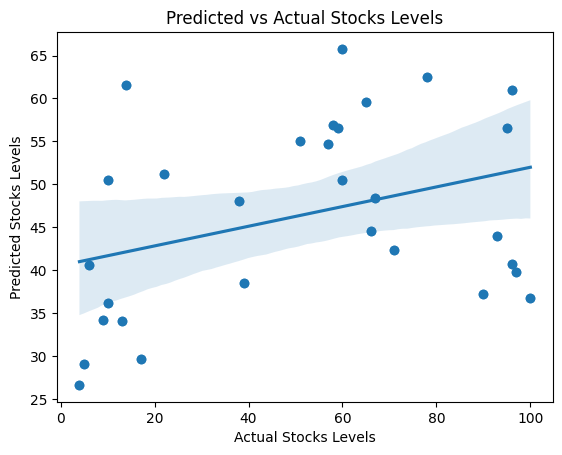

In [21]:
# Create a scatter plot with the actual Stocks Levels on the x-axis and the predicted Stocks Levels values on the y-axis
plt.scatter(y_test, y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Stocks Levels')
plt.ylabel('Predicted Stocks Levels')
plt.title('Predicted vs Actual Stocks Levels')
plt.show()

In [25]:
file_path = r'C:\Users\omgha\OneDrive\Documents\GitHub\SupplyChainManagement\ml\models\Stock_level_model.h5'
with open(file_path, 'wb') as f:
    pickle.dump(model, f)